<a href="https://colab.research.google.com/github/RoyaSains/musa-650-spring-2025/blob/main/week06/DL_Basics1_SimpleMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Simple multi-layer perceptron**


In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from tensorflow.python.keras.utils import np_utils


**Set vars, load MNIST (hand written digits) data**

In [2]:
batch_size = 20000
num_classes = 10
epochs = 5

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

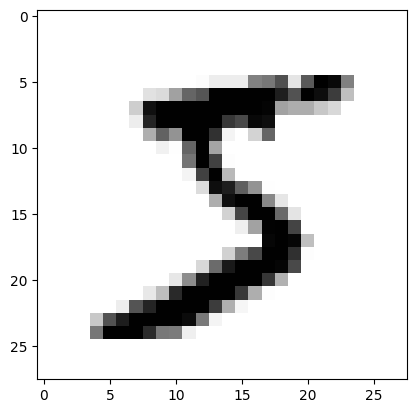

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()


In [5]:
np.sum(y_train==8)

5851

**Visualize data**

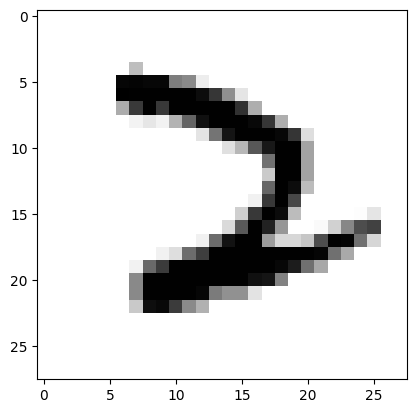

2


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3890],cmap=plt.cm.binary)
plt.show()
x_train[0].shape

print(y_train[3890])

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # neural networks work on float
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train[0:20]

60000 train samples
10000 test samples


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [7]:
y_train.shape

(60000,)

In [8]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

y_train.shape

(60000, 10)

In [ ]:
y_train[0:20,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**Model description**

- Put the "lego blocks" together


In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

**Visualization of the model**

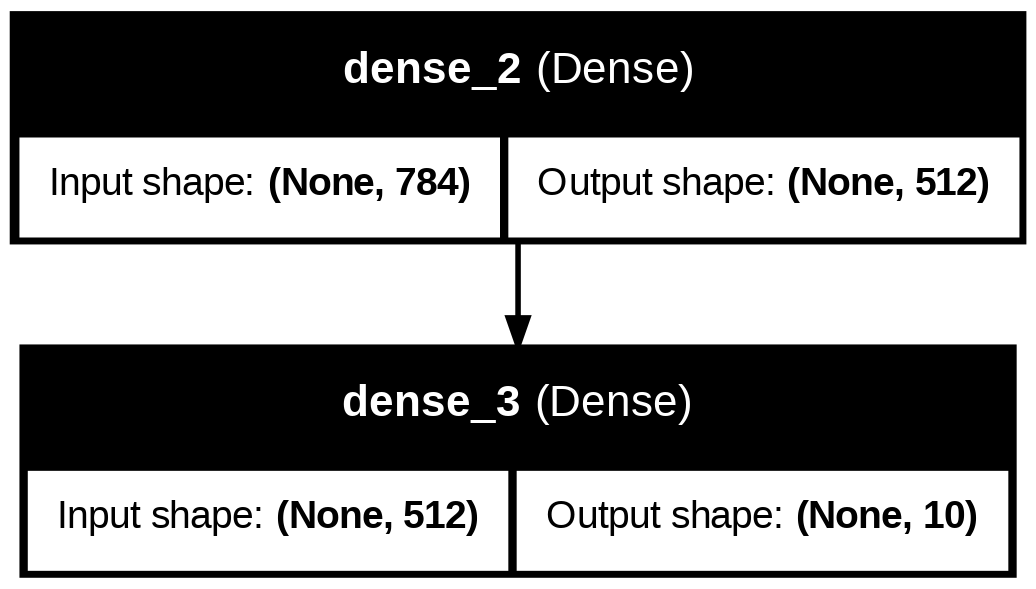

In [11]:
from tensorflow.keras.utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(model, show_shapes=True, show_layer_names=True)

**Compile the model**

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

**Fit the model**

In [22]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 854ms/step - accuracy: 0.9246 - loss: 0.2734 - val_accuracy: 0.9288 - val_loss: 0.2585
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 950ms/step - accuracy: 0.9258 - loss: 0.2666 - val_accuracy: 0.9278 - val_loss: 0.2592
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 815ms/step - accuracy: 0.9248 - loss: 0.2710 - val_accuracy: 0.9284 - val_loss: 0.2569
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 776ms/step - accuracy: 0.9272 - loss: 0.2573 - val_accuracy: 0.9300 - val_loss: 0.2465
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 772ms/step - accuracy: 0.9295 - loss: 0.2542 - val_accuracy: 0.9279 - val_loss: 0.2498
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 993ms/step - accuracy: 0.9271 - loss: 0.2533 - val_accuracy: 0.9318 - val_loss: 0.2384
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 707ms/step - accuracy: 0.9346 - loss: 0.2376 - val_accuracy: 0.9320 - val_loss: 0.2366
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 805ms/step - accuracy: 0.9298 - loss: 0.2447 - val_accuracy: 0.9322 - val_loss:

**Evaluate the model**

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2729390561580658
Test accuracy: 0.9229999780654907


In [23]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
y_pred.shape

(10000, 10)

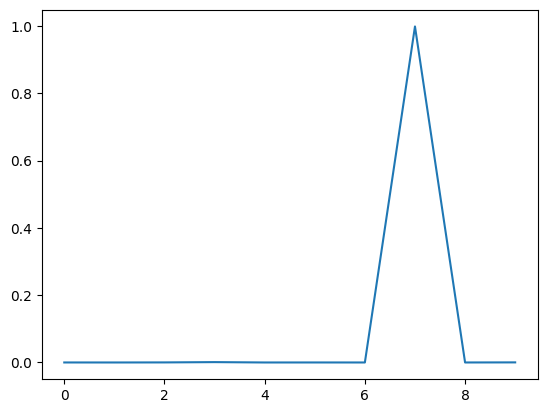

In [36]:
plt.plot(y_pred[0,:])
plt.show()

In [25]:
y_pred[0,:] # really small probability of being 1, 2...and high probability ofbeing "7" for Value at number 0.

array([3.9952261e-05, 1.9350794e-07, 1.8826283e-04, 1.0705839e-03,
       2.1273102e-06, 4.9900576e-05, 1.2282027e-07, 9.9835956e-01,
       1.0905583e-05, 2.7848553e-04], dtype=float32)

In [26]:
y_predn = np.argmax(y_pred, axis=1) # gets index of probability being the highest

In [27]:
y_testn = np.argmax(y_test, axis=1)

In [31]:
np.where(y_predn != y_testn)[0][0:5]

array([  8,  33,  92, 124, 149])

In [32]:
y_testn[8]

5

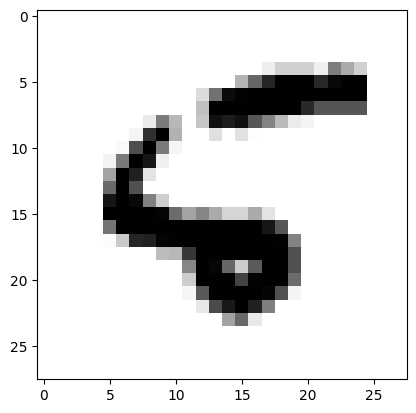

In [35]:
# prompt: plot image at index 8

import matplotlib.pyplot as plt
plt.imshow(x_test[8].reshape(28,28), cmap=plt.cm.binary)
plt.show()


In [28]:
(y_predn == y_testn).sum()

9356

Try MNIST Fashion

In [13]:
from keras.datasets import fashion_mnist
import numpy as np
from tensorflow.python.keras.utils import np_utils

In [9]:
batch_size = 5000
label_classes = 10
epochs = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [42]:
x_train.shape

(60000, 28, 28)

In [46]:
np.sum(y_train==7) # all labels are represented in the data equally

6000

In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train[0:20]

60000 train samples
10000 test samples


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [16]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, label_classes)
y_test = np_utils.to_categorical(y_test, label_classes)

y_train.shape

(60000, 10)

In [19]:
np.array(x_train[0])

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e